Projekt
=======


Wprowadzenie
------------

Zbiór danych dotyczący ćwiczeń członków siłowni, który został utworzony na podstawie 973 próbek zebranych podczas sesji treningowych. Dane zawierają informacje demograficzne, fizjologiczne oraz szczegóły dotyczące rutyny treningowej użytkowników siłowni. Zbiór został najprawdopodobniej utworzony na siłowni lub centrum fitness poprzez ankietowanie, monitorowanie i rejestrowanie aktywności oraz parametrów zdrowotnych uczestników. Pytania badawcze będą dotyczyć m.in. zależności między poziomem doświadczenia a wynikami treningowymi, wpływu cech fizycznych na intensywność ćwiczeń, oraz analizy wzorców postępów i zdrowia użytkowników.

Czyszczenie i porządkowanie danych
----------------------------------


Importowanie wykorzystywanych bibliotek

In [55]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind, f_oneway, skew

Przypisanie obiektu DataFrame utworzonego ze wczytanego pliku .csv  do zmiennej df

In [56]:
df = pd.read_csv('data/silownia_new.csv')

Podglądnięcie fragmentu obiektu DataFrame

In [57]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,NaN,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,NaN
1,46.0,Female,74.9,1.53,179,151,66,1.30,883,NaN,33.9,2.1,4,2,32.00
2,32.0,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,NaN
3,25.0,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
4,38.0,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39


Sprawdzenie rozkładu wartości numerycznych w zbiorze danych

In [58]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,873.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,823.000000
mean,38.626575,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.816549
std,12.273464,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.600485
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.105000
50%,39.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,23.940000
75%,50.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.450000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,47.720000


Wyświetlenie dodatkowych informacji dotyczących zbioru danych

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            873 non-null    float64
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    int64  
 9   Workout_Type                   823 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

Sprawdzenie czy w poszczególnych kolumnach są brakujące wartości

In [60]:
df.isna().sum()

Age                              100
Gender                             0
Weight (kg)                        0
Height (m)                         0
Max_BPM                            0
Avg_BPM                            0
Resting_BPM                        0
Session_Duration (hours)           0
Calories_Burned                    0
Workout_Type                     150
Fat_Percentage                     0
Water_Intake (liters)              0
Workout_Frequency (days/week)      0
Experience_Level                   0
BMI                              150
dtype: int64

W zbiorze danych brakuje wartości w kolumnach dotyczących wieku, typu treningu oraz BMI. Rozpatrzymy każdą z kolumn i dobierzemy odpowiednie działanie.

Zbiór danych jest wybrakowany w ilości 150 rekordów wartości BMI. Jednocześnie dostępne mamy dla wszystkich obserwacji wartości składające się na wzór BMI tj. waga i wzrost użytkownika. Dzięki temu możemy w prosty sposób dokonać imptutacji deterministycznej uzywając wzoru:
$$
BMI = \frac{\text{waga w kg}}{\text{wzrost do kwadratu}}
$$


In [61]:
mask_missing_bmi = df["BMI"].isna()
df.loc[mask_missing_bmi, 'BMI'] = round((
    df.loc[mask_missing_bmi, 'Weight (kg)'] /
    (df.loc[mask_missing_bmi, 'Height (m)'] ** 2)
), 2)

Wizualizujemy problem pozostałych braków w zbiorze danych przy pomocy heatmapy

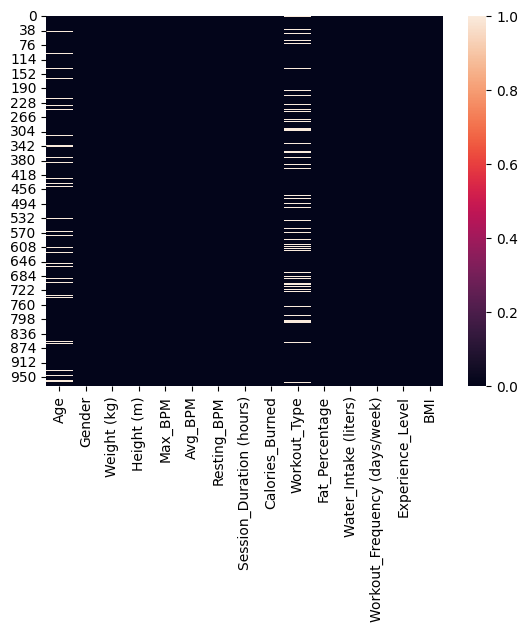

In [62]:
sns.heatmap(df.isna())
plt.show()

Heatmapa wskazuje, że wzory braków są nieregularne, rozproszone i niezależne od siebie. Pozwala to przypuszczać, że problem jest losowy (**MCAR** lub **MAR**).

Dla pewności sprawdzamy korelację między brakami obu cech.

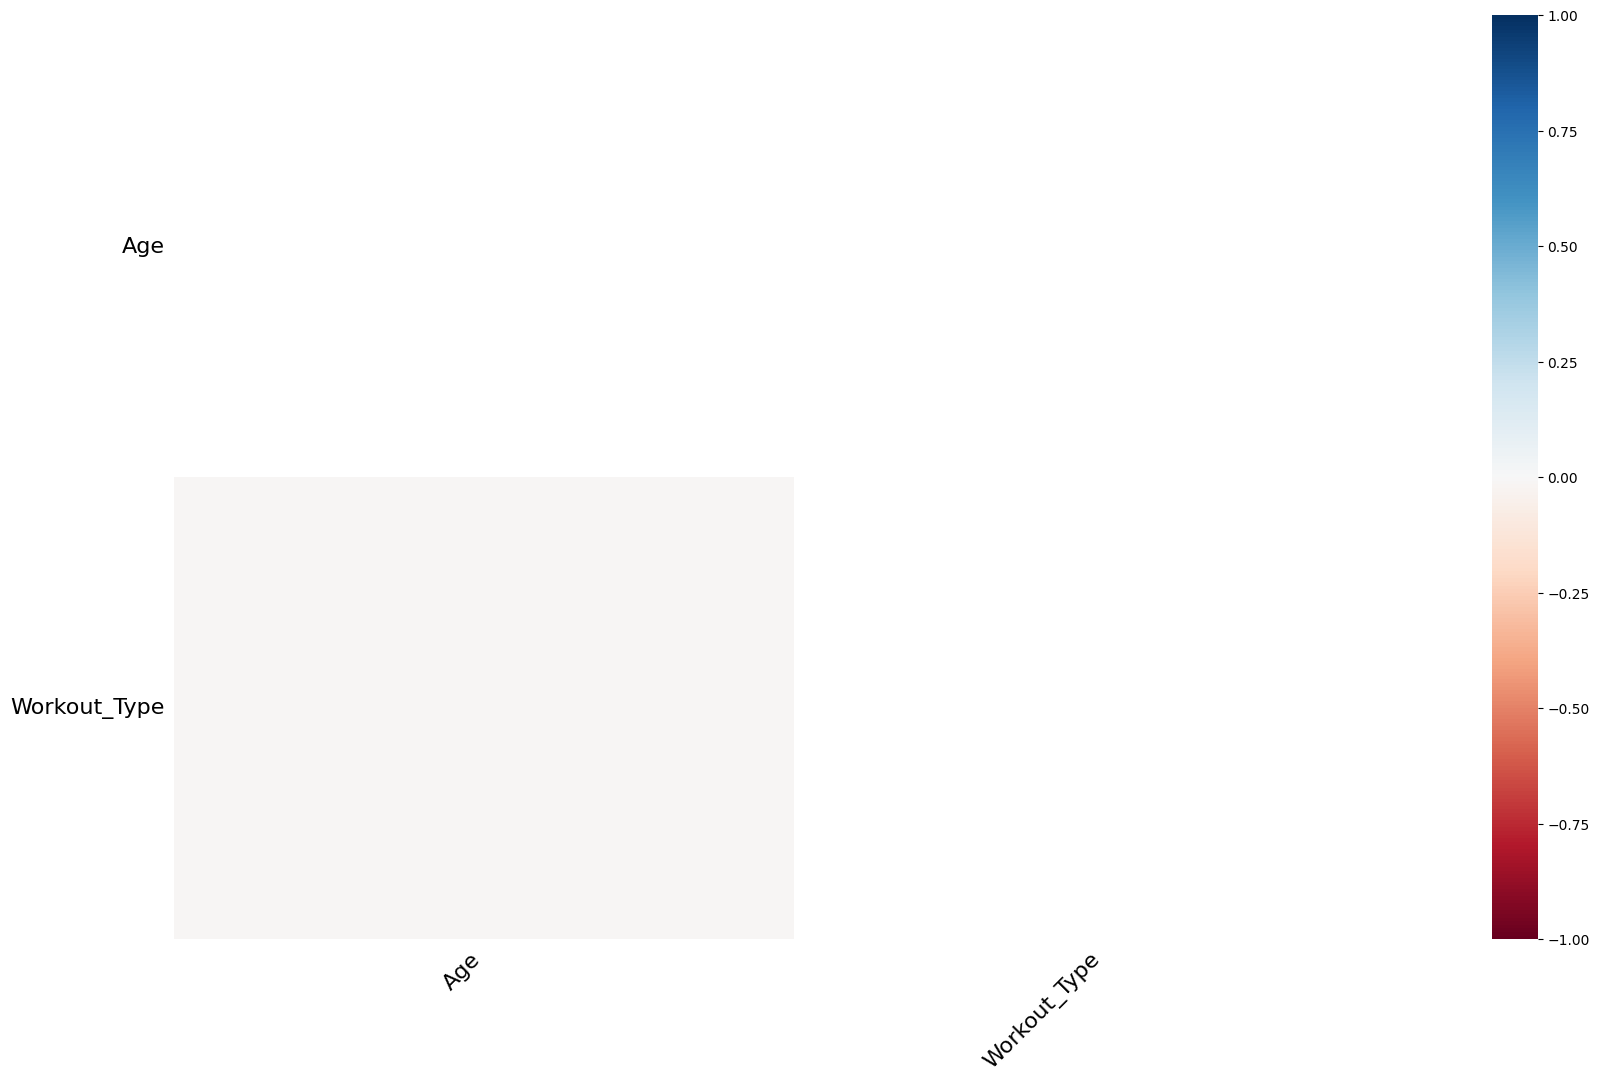

In [63]:
msno.heatmap(df)
plt.show()

Powyższa heatmapa potwierdza, że nie ma związku między brakami w obu kolumnach, więc można rozpatrywać je osobno.

Następnie sprawdzamy, czy występowanie braków jest zależne od pozostałych cech zbioru (płeć, waga itd.)

W tym celu tworzymy kolumny z wartościami maskującymi (True/False) braki odpowiednio w **Age** i **Workout_Type**

In [64]:
df['Age_missing'] = df['Age'].isnull()
df['Workout_Type_missing'] = df['Workout_Type'].isnull()

Wykonujemy testy zależności chi^2 dla zmiennych kategorycznych i t-test dla liczbowych.

In [65]:
missing_cols = ['Age_missing', 'Workout_Type_missing']
cat_cols = ['Gender', 'Experience_Level']

for missing_col in missing_cols:
    for cat_col in cat_cols: 
        table = pd.crosstab(df[cat_col], df[missing_col])
        _, p, _, _ = chi2_contingency(table)
        print(f'{missing_col} vs. {cat_col} p-value: {p:.4f}')

Age_missing vs. Gender p-value: 0.2060
Age_missing vs. Experience_Level p-value: 0.4017
Workout_Type_missing vs. Gender p-value: 0.4011
Workout_Type_missing vs. Experience_Level p-value: 0.5515


In [66]:
num_cols = ['Weight (kg)', 'Height (m)', 'Max_BPM',	'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)',	'Workout_Frequency (days/week)', 'BMI']

for missing_col in missing_cols:
    for num_col in num_cols: 
        brak = df[df[missing_col]][num_col].dropna()
        nobrak = df[~df[missing_col]][num_col].dropna()
        stat, p = ttest_ind(brak, nobrak, equal_var=False)
        print(f'{missing_col} vs. {num_col} p-value: {p}')

Age_missing vs. Weight (kg) p-value: 0.6018984755840453
Age_missing vs. Height (m) p-value: 0.5429481038896465
Age_missing vs. Max_BPM p-value: 0.5860789563080888
Age_missing vs. Avg_BPM p-value: 0.7134787148446189
Age_missing vs. Resting_BPM p-value: 0.8978430205486978
Age_missing vs. Session_Duration (hours) p-value: 0.9958500623982969
Age_missing vs. Calories_Burned p-value: 0.7162623084463157
Age_missing vs. Fat_Percentage p-value: 0.49694936125412825
Age_missing vs. Water_Intake (liters) p-value: 0.5381552006310732
Age_missing vs. Workout_Frequency (days/week) p-value: 0.6143054077782016
Age_missing vs. BMI p-value: 0.6821886760071225
Workout_Type_missing vs. Weight (kg) p-value: 0.8406479240720991
Workout_Type_missing vs. Height (m) p-value: 0.7953272845225536
Workout_Type_missing vs. Max_BPM p-value: 0.5931341998877502
Workout_Type_missing vs. Avg_BPM p-value: 0.7955564650527842
Workout_Type_missing vs. Resting_BPM p-value: 0.23463197612815023
Workout_Type_missing vs. Session_Du

W oparciu o powyższe wyniki (wartości p-value > 0.05 dla wszystkich przypadków) wnioskujemy, że braki są zupełnie losowe (**MCAR**), a ze względu na to, że są one dość liczne podjęliśmy decyzję o imputowaniu wartości zamiast usuwania wierszy.

Sprawdzamy rozkład danych dla kolumny wiek, aby dobrać odpowiednią funkcję.

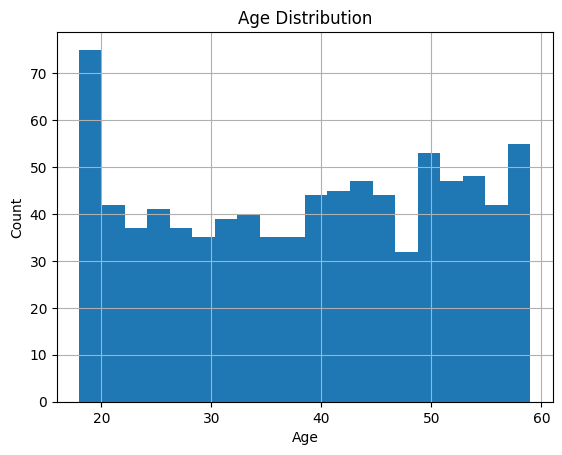

In [67]:
df['Age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Rozkład wieku nie jest idealnie symetryczny - widoczny jest spory pik po lewej stronie histogramu (zbiór zawiera nadreprezentację młodych użytkowników siłowni). Średnia może być zawyżona przez osoby starsze, więc imputacja medianą lepiej odzwierciedli typowego użytkownika.

In [68]:
df['Age_Imputed'] = df['Age'].fillna(df['Age'].median())

Jeżeli natomiast chodzi o typ treningu to uzupełnienie najczęstszą wartością znacząco zwiększyłoby liczebność jednej grupy i zniekształciło rozkład, dlatego braki zostaną oznaczone jako "Unknown". Pozostawienie braków jako wyodrębniona grupa pozwala nam także wykluczyć je z analizy jeśli zajdzie taka potrzeba.

In [69]:
df['Workout_Type'] = df['Workout_Type'].fillna('Unknown')

Sprawdzamy, że typ treningu został zmieniony z pustej wartości na etykietę 'nieznany'.

In [70]:
df['Workout_Type'].value_counts()

Workout_Type
Cardio      220
Strength    219
Yoga        200
HIIT        184
Unknown     150
Name: count, dtype: int64

Przekształcamy dane zawarte w zbiorze w celu podniesienia intuicyjności i lepszego ich zrozumienia.

In [71]:
# Zamiana liczb na tekstowy poziom
df['Experience_Level'] = df['Experience_Level'].map({
    1: 'Beginner',
    2: 'Intermediate',
    3: 'Advanced'
})

In [72]:
df['Session_Duration (minutes)'] = df['Session_Duration (hours)'] * 60

Sprawdzamy wartości w zbiorze danych pod kątem utworzonych reguł logicznych (np. wzrost czy waga nie mogą być ujemne ani równe zeru) i posiadanej wiedzy (puls człowieka nie powinien wynosić ponad 220 uderzeń na minutę itp.)

In [73]:
tolerance = 0.01

def check_rules(df):
    rules = {
        "Age > 0": df["Age_Imputed"] > 0,
        "Weight > 0": df["Weight (kg)"] > 0,
        "Height > 0": df["Height (m)"] > 0,
        "Max_BPM > 0": df["Max_BPM"] > 0,
        "Max_BPM < 220": df["Max_BPM"] < 220,
        "Avg_BPM > 0": df["Avg_BPM"] > 0,
        "Resting_BPM > 0": df["Resting_BPM"] > 0,
        "Fat_Percentage > 0": df["Fat_Percentage"] > 0,
        "Fat_Percentage < 100": df["Fat_Percentage"] < 100,
        "Workout_Frequency (days/week) >= 0": df["Workout_Frequency (days/week)"] >= 0,
        "Workout_Frequency (days/week) <= 7": df["Workout_Frequency (days/week)"] <= 7,
        "Calories_Burned >= 0": df["Calories_Burned"] >= 0,

        "Age < 130": df["Age_Imputed"] < 130,
        "Weight < 640": df["Weight (kg)"] < 640,
        "Height < 2.3": df["Height (m)"] < 2.3,

        "Max_BPM >= Avg_BPM": df["Max_BPM"] >= df["Avg_BPM"],
        "Avg_BPM >= Resting_BPM": df["Avg_BPM"] >= df["Resting_BPM"],
        "BMI = Weight / Height ** 2": np.abs(df["BMI"] - (df["Weight (kg)"] / (df["Height (m)"] ** 2))) < tolerance
    }
    return rules

rules = check_rules(df)

for rule, result in rules.items():
    print(f"{rule}: {result.all()}")

Age > 0: True
Weight > 0: True
Height > 0: True
Max_BPM > 0: True
Max_BPM < 220: True
Avg_BPM > 0: True
Resting_BPM > 0: True
Fat_Percentage > 0: True
Fat_Percentage < 100: True
Workout_Frequency (days/week) >= 0: True
Workout_Frequency (days/week) <= 7: True
Calories_Burned >= 0: True
Age < 130: True
Weight < 640: True
Height < 2.3: True
Max_BPM >= Avg_BPM: False
Avg_BPM >= Resting_BPM: True
BMI = Weight / Height ** 2: True


In [74]:
violations = {rule: ~result for rule, result in rules.items()}

summary = {rule: result.sum() for rule, result in violations.items()}

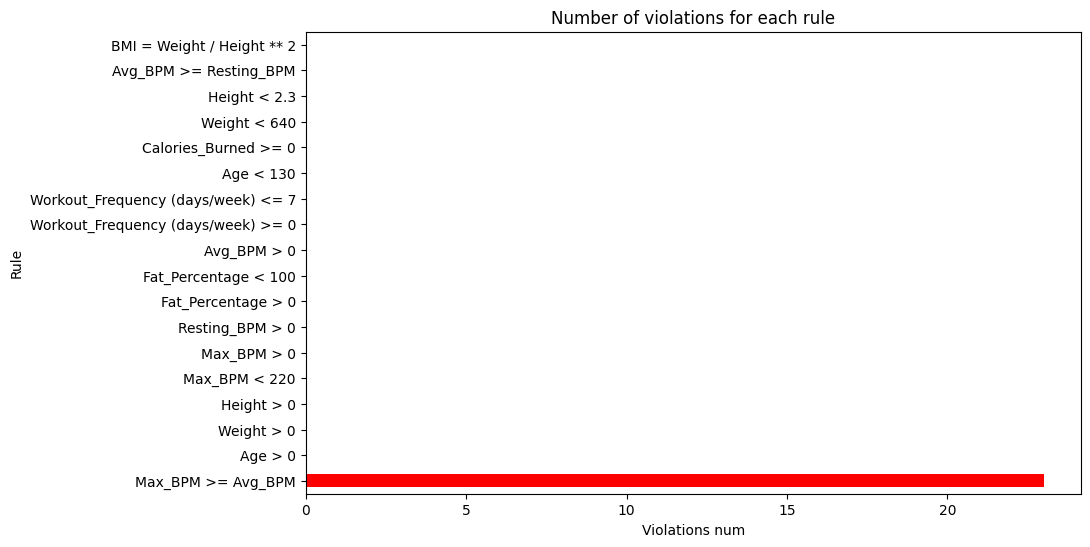

In [75]:
pd.Series(summary).sort_values(ascending=False).plot(kind='barh', figsize=(10, 6), color='red')
plt.title("Number of violations for each rule")
plt.xlabel("Violations num")
plt.ylabel("Rule")
plt.show()

Dataset zawiera błędne dane dotyczące średniego pomiaru akcji serca użytkowników, gdyż logicznie średnia ilość uderzeń na minutę (Avg_BPM) nie może być wyższa od maksymalnej ilości uderzeń (Max_BPM). Z tego względu próbujemy odnaleźć źródło błędu.

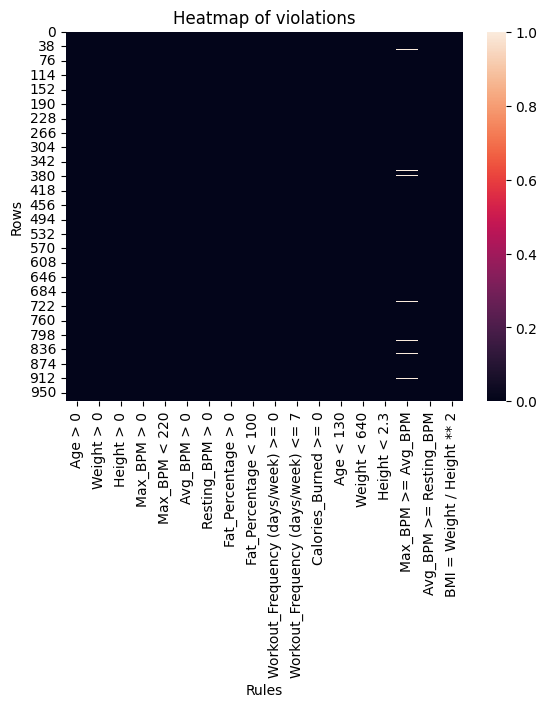

In [76]:
violations_df = pd.DataFrame(violations)

sns.heatmap(violations_df.astype(int), cbar=True)
plt.title("Heatmap of violations")
plt.xlabel("Rules")
plt.ylabel("Rows")
plt.show()


Naruszenia nie mają klarownego wzoru.

W celu dalszej analizy separujemy obserwacje poprawne i błędne do osobnych obiektów DataFrame w poszukiwaniu istotnych zależności między błędnymi pomiarami Avg_BPM, a pozostałymi cechami.

In [77]:
valid_avg_bpm_mask = (df["Max_BPM"] >= df["Avg_BPM"])

valid_avg_bpm_rows = df[valid_avg_bpm_mask]
invalid_avg_bpm_rows = df[~valid_avg_bpm_mask]

invalid_avg_bpm_rows.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Age_missing,Workout_Type_missing,Age_Imputed,Session_Duration (minutes)
16,19.0,Female,64.0,1.53,166,167,58,1.33,1111,HIIT,29.8,2.3,3,Intermediate,27.34,False,False,19.0,79.8
46,24.0,Male,54.7,1.74,160,167,53,0.84,772,Yoga,22.9,3.6,3,Beginner,18.07,False,False,24.0,50.4
56,59.0,Female,65.5,1.52,161,162,61,1.40,1021,Yoga,31.2,2.1,3,Intermediate,28.35,False,False,59.0,84.0
95,59.0,Female,54.6,1.57,164,169,64,0.58,441,Cardio,29.2,2.3,3,Beginner,22.15,False,False,59.0,34.8
106,41.0,Male,71.7,1.96,162,168,51,0.51,424,Yoga,27.3,2.5,2,Beginner,18.66,False,False,41.0,30.6


In [78]:
valid_avg_bpm_rows.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI,Age_Imputed,Session_Duration (minutes)
count,854.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,38.594848,73.890842,1.723547,180.296842,143.224211,62.218947,1.259411,904.734737,24.955053,2.631368,3.330526,24.891495,38.635789,75.564632
std,12.255000,21.212923,0.127746,11.344509,14.077583,7.341472,0.343101,272.913059,6.300144,0.602546,0.915972,6.629312,11.619267,20.586061
min,18.000000,40.000000,1.500000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,12.320000,18.000000,30.000000
25%,28.000000,58.100000,1.620000,171.000000,131.000000,56.000000,1.040000,719.250000,21.225000,2.200000,3.000000,20.110000,29.000000,62.400000
50%,39.000000,70.050000,1.710000,181.000000,142.000000,62.000000,1.270000,888.000000,26.200000,2.600000,3.000000,24.195000,39.000000,76.200000
75%,50.000000,86.075000,1.800000,190.000000,155.750000,68.000000,1.460000,1074.750000,29.300000,3.100000,4.000000,28.560000,49.000000,87.600000
max,59.000000,129.900000,2.000000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,49.840000,59.000000,120.000000


In [79]:
invalid_avg_bpm_rows.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI,Age_Imputed,Session_Duration (minutes)
count,19.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,40.052632,72.360870,1.682609,162.826087,166.173913,62.391304,1.133043,933.826087,25.873913,2.430435,2.956522,25.764783,39.869565,67.982609
std,13.351961,21.398359,0.122705,2.461562,2.348155,6.853925,0.323608,265.439370,4.246840,0.460666,0.705708,7.980813,12.084191,19.416480
min,19.000000,41.600000,1.510000,160.000000,162.000000,50.000000,0.510000,424.000000,16.500000,1.500000,2.000000,15.720000,19.000000,30.600000
25%,29.500000,60.650000,1.615000,161.000000,165.000000,58.500000,0.880000,762.000000,22.750000,2.200000,2.500000,20.570000,31.000000,52.800000
50%,41.000000,65.500000,1.650000,162.000000,167.000000,63.000000,1.140000,986.000000,26.600000,2.300000,3.000000,23.800000,39.000000,68.400000
75%,51.500000,77.300000,1.740000,164.000000,168.000000,67.000000,1.355000,1127.500000,29.000000,2.650000,3.000000,28.765000,49.500000,81.300000
max,59.000000,123.300000,1.960000,168.000000,169.000000,74.000000,1.830000,1359.000000,32.800000,3.600000,4.000000,46.980000,59.000000,109.800000


W zbiorze obserwacji podejrzanych wartości Max_BPM są zaskakująco niskie, podczas gdy Avg_BPM jest nadzywczaj wysokie względem typowych wartości w zbiorze obserwacji poprawnych.

Przeprowadzamy testy zależności między wartościami podejrzanymi, a innymi cechami zbioru danych.

In [80]:
cat_cols = ['Gender', 'Experience_Level', 'Workout_Type']

for cat_col in cat_cols:
    contingency = pd.crosstab(df[cat_col], ~valid_avg_bpm_mask)
    _, p, _, _ = chi2_contingency(contingency)
    print(f'Avg_BPM_Violation vs. {cat_col} p-value: {p:.4f}')


Avg_BPM_Violation vs. Gender p-value: 1.0000
Avg_BPM_Violation vs. Experience_Level p-value: 0.2741
Avg_BPM_Violation vs. Workout_Type p-value: 0.7008


In [81]:
num_cols = ['Max_BPM', 'Age_Imputed', 'Weight (kg)', 'Height (m)', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI']

for num_col in num_cols:
    _, p = ttest_ind(
        df.loc[valid_avg_bpm_mask, num_col],
        df.loc[~valid_avg_bpm_mask, num_col],
        equal_var=False)
    print(f'Invalid Avg_BPM vs. {num_col} p-value: {p}')

Invalid Avg_BPM vs. Max_BPM p-value: 5.032001072615572e-32
Invalid Avg_BPM vs. Age_Imputed p-value: 0.6327838986968635
Invalid Avg_BPM vs. Weight (kg) p-value: 0.737757972006482
Invalid Avg_BPM vs. Height (m) p-value: 0.12778550459406324
Invalid Avg_BPM vs. Resting_BPM p-value: 0.9063287818999843
Invalid Avg_BPM vs. Session_Duration (hours) p-value: 0.07741834046027256
Invalid Avg_BPM vs. Calories_Burned p-value: 0.6086829912251674
Invalid Avg_BPM vs. Fat_Percentage p-value: 0.3219090685054674
Invalid Avg_BPM vs. Water_Intake (liters) p-value: 0.051526716091527806
Invalid Avg_BPM vs. Workout_Frequency (days/week) p-value: 0.020092014164777558
Invalid Avg_BPM vs. BMI p-value: 0.6077823108950082


W wyniku testów dostrzegamy zależność między niepoprawnymi wartościami średniego pulsu, a wartościami maksymalnymi oraz częstotliwością treningów.

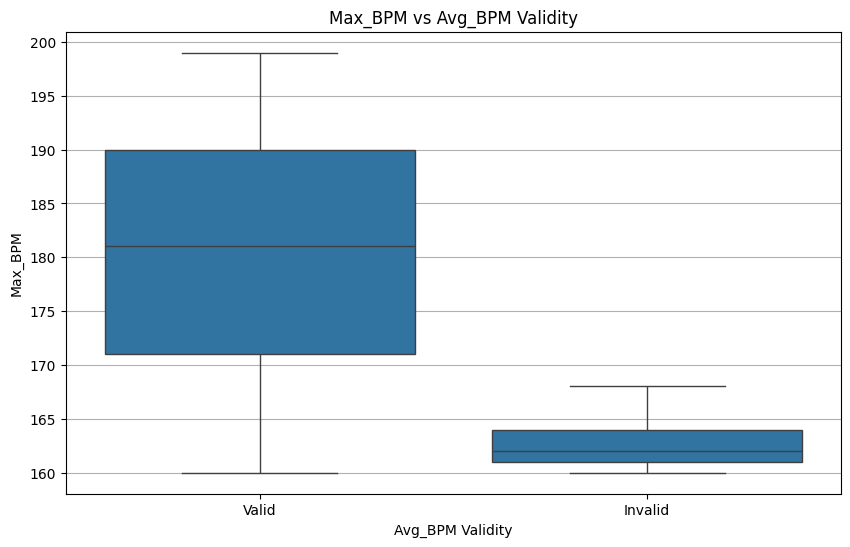

In [82]:
df["Avg_BPM_Valid"] = np.where(valid_avg_bpm_mask, "Valid", "Invalid")
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="Avg_BPM_Valid",
    y="Max_BPM"
)
plt.title(f"Max_BPM vs Avg_BPM Validity")
plt.xlabel("Avg_BPM Validity")
plt.ylabel("Max_BPM")
plt.grid(True, axis="y")
plt.show()

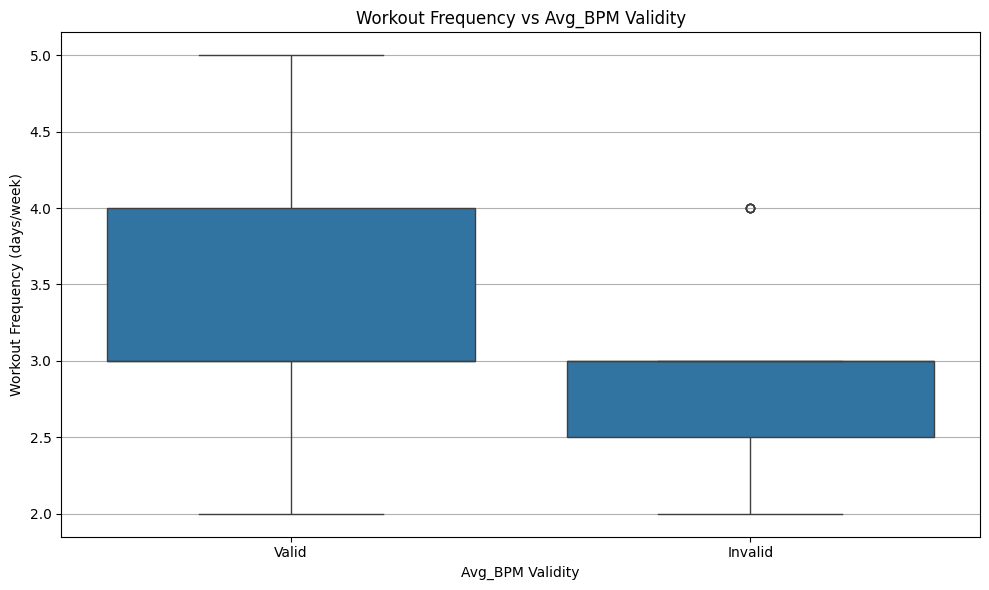

In [83]:
df["Avg_BPM_Valid"] = np.where(valid_avg_bpm_mask, "Valid", "Invalid")
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="Avg_BPM_Valid",
    y="Workout_Frequency (days/week)"
)
plt.title(f"Workout Frequency vs Avg_BPM Validity")
plt.xlabel("Avg_BPM Validity")
plt.ylabel("Workout Frequency (days/week)")
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()

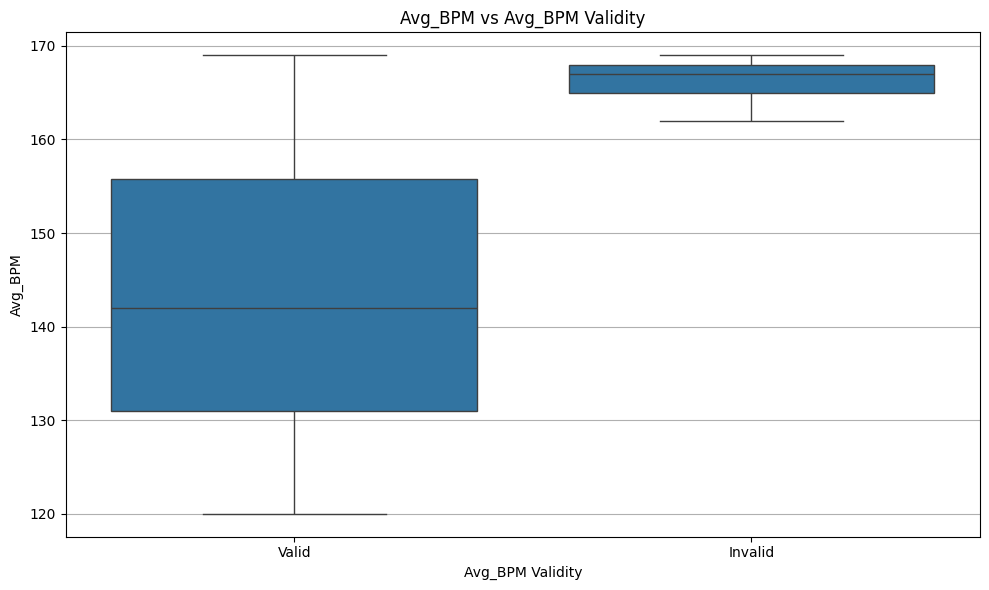

In [84]:
df["Avg_BPM_Valid"] = np.where(valid_avg_bpm_mask, "Valid", "Invalid")
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="Avg_BPM_Valid",
    y="Avg_BPM"
)
plt.title(f"Avg_BPM vs Avg_BPM Validity")
plt.xlabel("Avg_BPM Validity")
plt.ylabel("Avg_BPM")
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()

Z powyższych wykresów widzimy, że wiersze z wartościami uznanymi za nieprawidłowe są konsekwentnie odmienne względem ogółu pozostałych obserwacji zarówno dla średniej akcji serca, ale także maksymalnego BPM oraz częstotliwości treningu. Wartości niepoprawne wyraźnie odróżniają się od ogólnej populacji danych co sugeruje, że rzeczywiście są one nieprawidłowe. Decydujemy się na ich usunięcie ze względu na występujący błąd logiczny, a także powiązanie między błędnymi rekordami, co może sugerować, że problem dotyczy całych wierszy.

In [85]:
df = valid_avg_bpm_rows
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Age_missing,Workout_Type_missing,Age_Imputed,Session_Duration (minutes)
0,NaN,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,Advanced,30.20,True,False,39.0,101.4
1,46.0,Female,74.9,1.53,179,151,66,1.30,883,Unknown,33.9,2.1,4,Intermediate,32.00,False,True,46.0,78.0
2,32.0,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,Intermediate,24.71,False,False,32.0,66.6
3,25.0,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,Beginner,18.41,False,False,25.0,35.4
4,38.0,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,Beginner,14.39,False,False,38.0,38.4


Badamy zbiór danych pod kątem zduplikowanych wierszy.

In [86]:
df.duplicated().sum()

np.int64(0)

W zbiorze nie znaleziono duplikatów.

W następnym kroku przeprowadzamy analizę wartości odstających (outlierów).

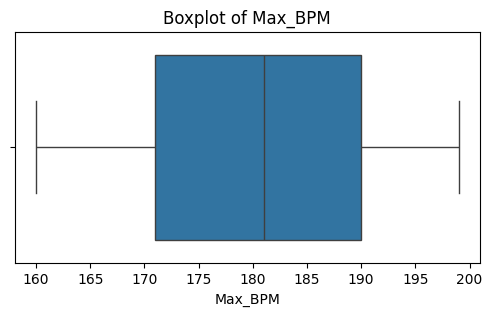

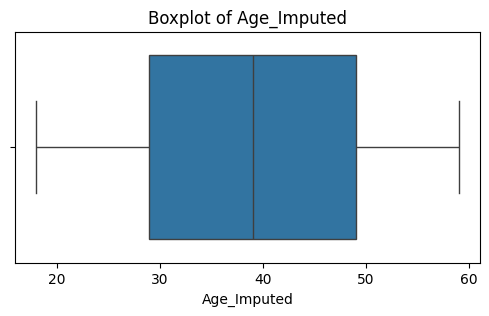

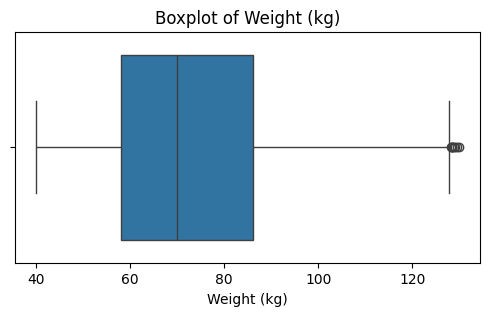

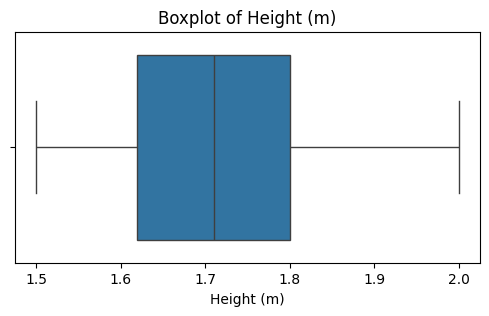

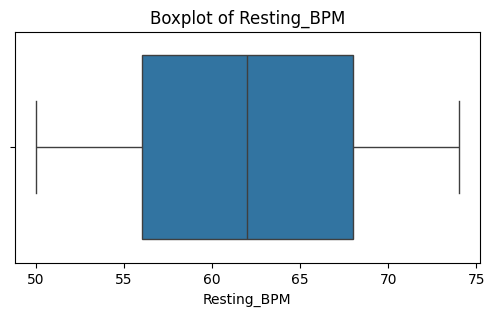

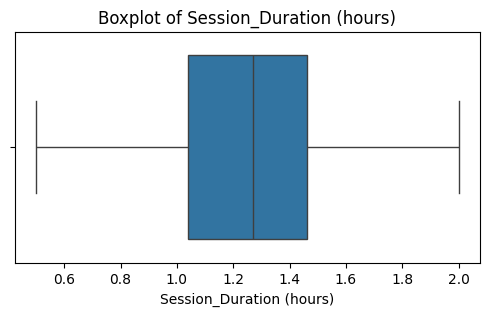

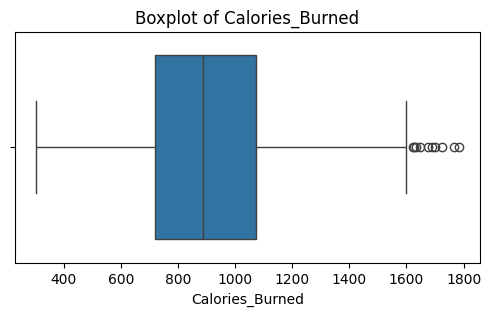

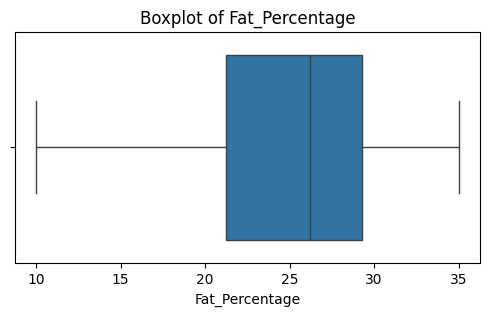

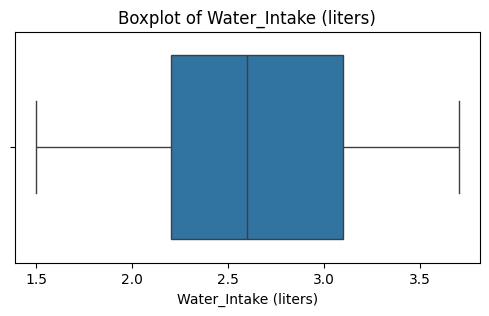

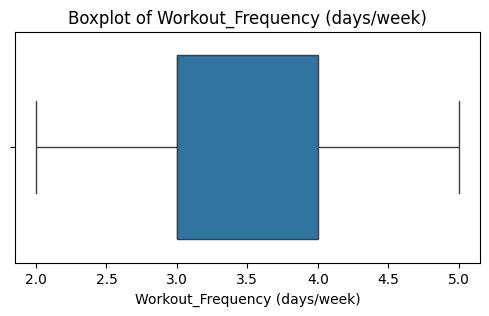

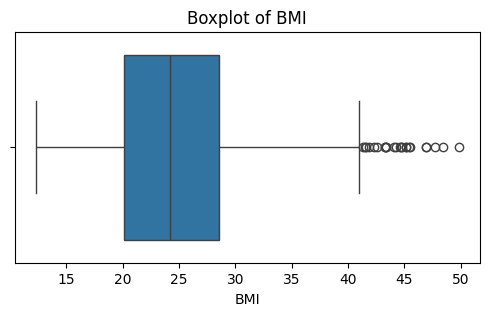

In [87]:
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

Widzimy wartości odstające na wykresie pudełkowym dla wagi, ilości spalonych kalorii oraz BMI. Jednocześnie są one jak najbardziej możliwe do wystąpienia (a w przypadku BMI zostały sprawdzone z równaniem) i podejmujemy decyzję o ich zostawieniu.

Wizualizacje
---

Po analizie braków i oczyszczeniu danych przechodzimy do eksploracyjnej analizy danych (**EDA**). W pierwszej kolejności prezentujemy wykresy słupkowe ukazujące częstość występowania poszczególnych kategorii w dostępnych zmiennych, aby uzyskać ogólny obraz rozkładu danych.

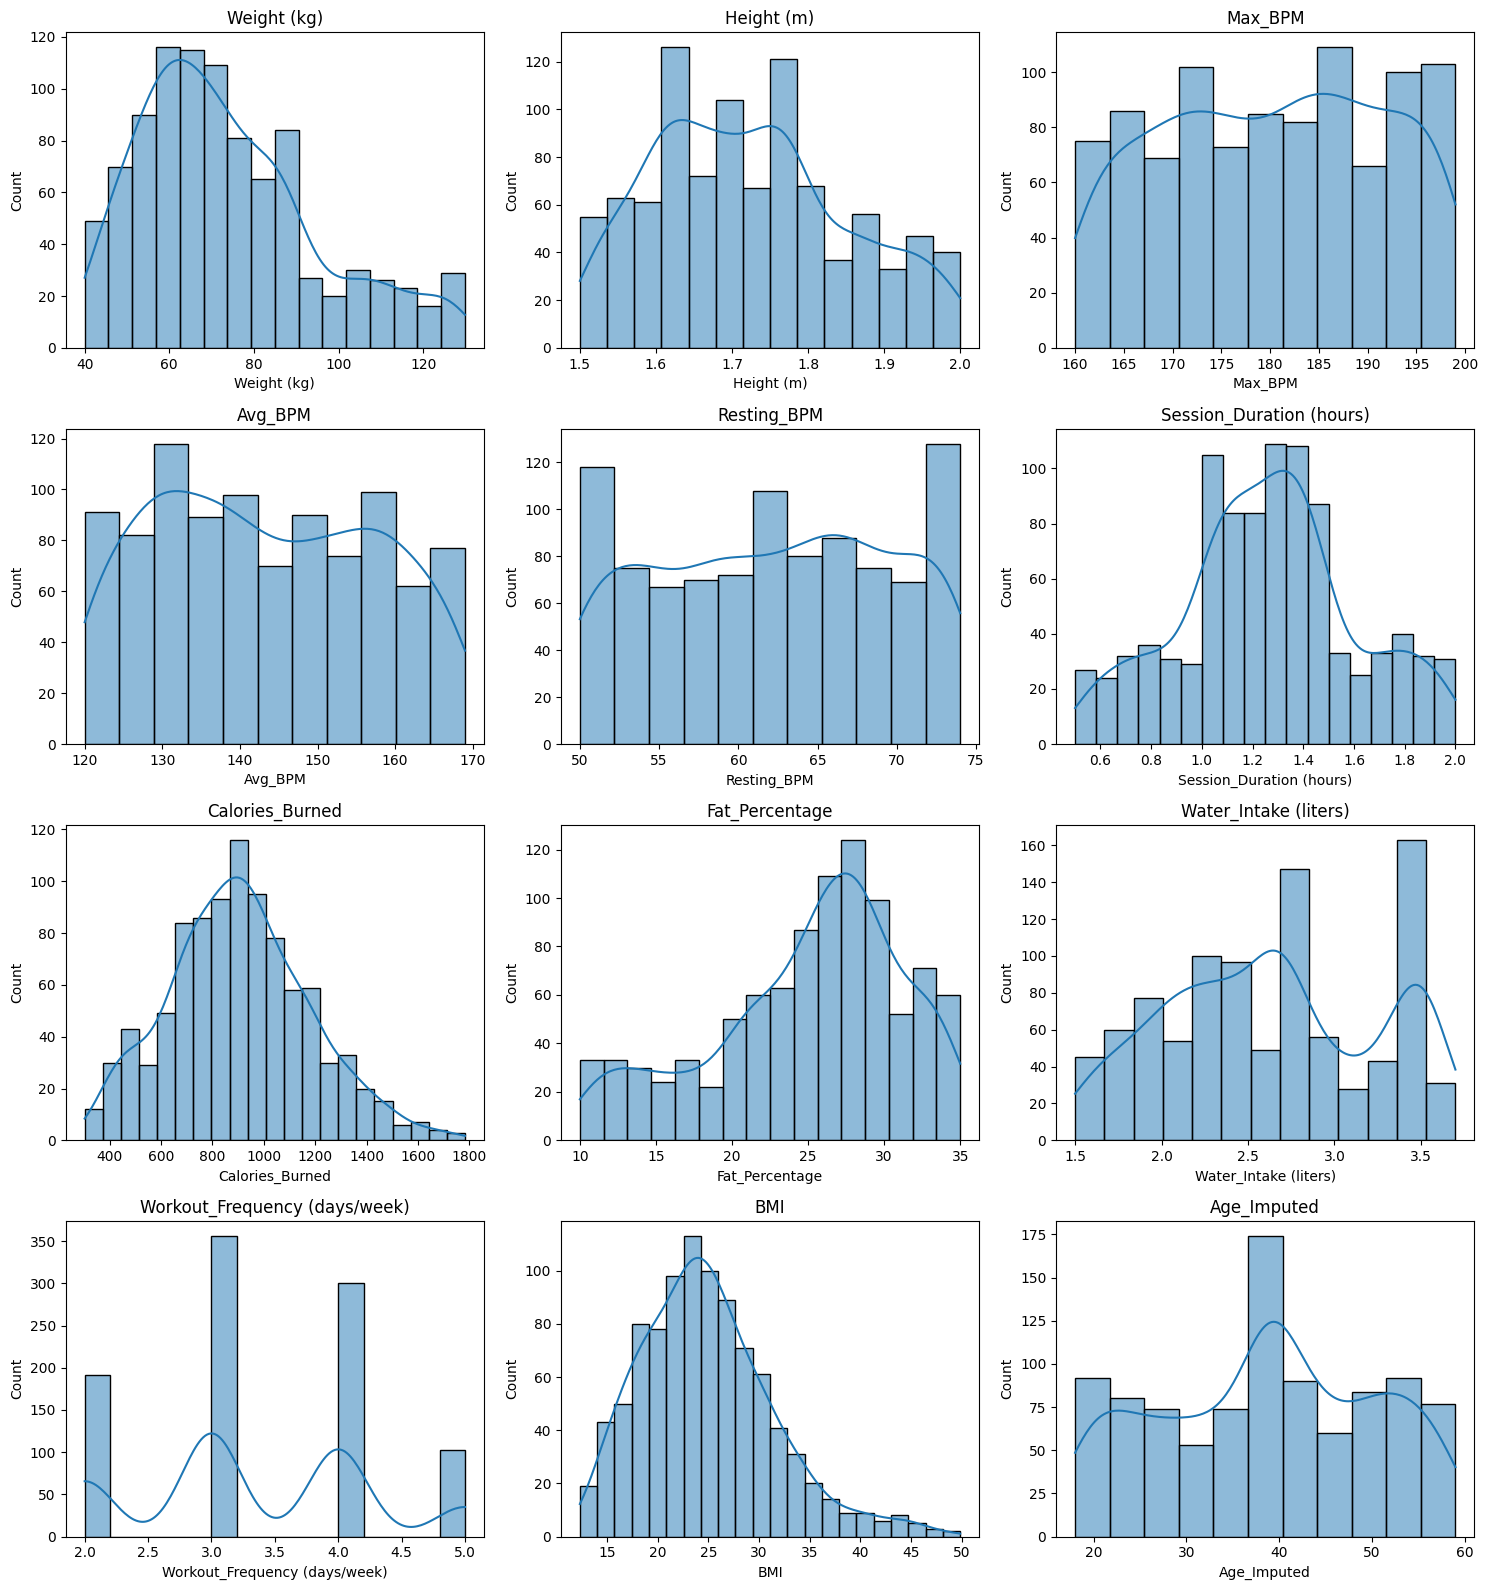

In [88]:
numeric_cols = df.select_dtypes(include='number').columns
exclude_cols = ['Age', 'Age_Transformed', 'Session_Duration (minutes)']
cols_to_check = [col for col in numeric_cols if col not in exclude_cols]

n_cols = 3
n_rows = (len(cols_to_check) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols_to_check):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'{col}')

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Mozemy zaobserwować:
  - Rozkład normalny dla **Session_Duration** 
  - Rozkład przesunięty dla: **BMI**, **Calories_Burned**, **Fat_Percentage** (zbadany pod kątem skośności niżej)
  - Odstające dane dla **Water_Intake**

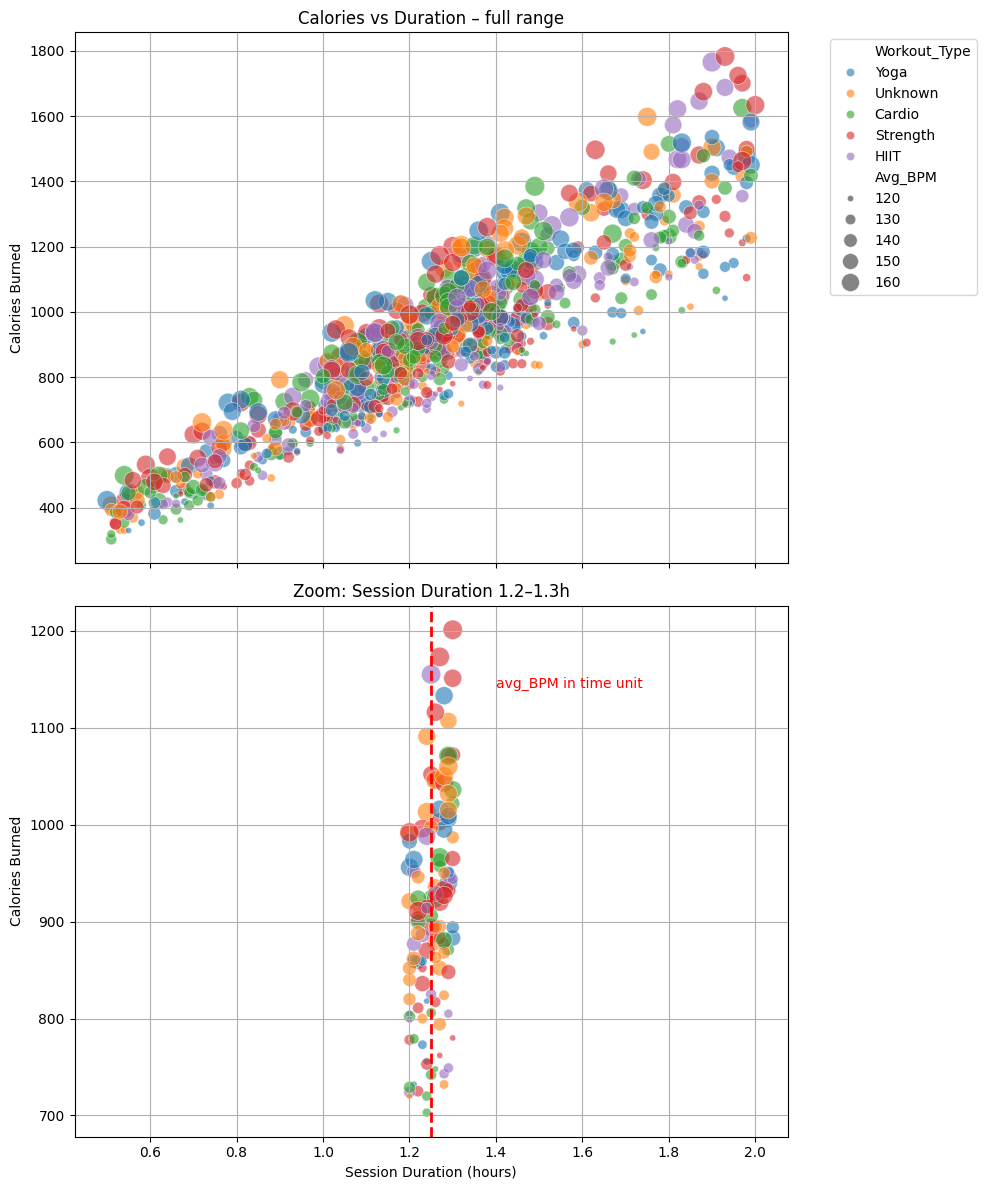

In [89]:
df_zoom = df[(df['Session_Duration (hours)'] >= 1.2) & (df['Session_Duration (hours)'] <= 1.3)]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

sns.scatterplot(
    data=df,
    x='Session_Duration (hours)',
    y='Calories_Burned',
    size='Avg_BPM',
    hue='Workout_Type',
    alpha=0.6,
    sizes=(20, 200),
    ax=ax1
)

ax1.set_title('Calories vs Duration – full range')
ax1.set_ylabel('Calories Burned')
ax1.set_xlabel('Session duration')
ax1.grid(True)

sns.scatterplot(
    data=df_zoom,
    x='Session_Duration (hours)',
    y='Calories_Burned',
    size='Avg_BPM',
    hue='Workout_Type',
    alpha=0.6,
    sizes=(20, 200),
    ax=ax2
)
ax2.axvline(x=1.25, color='red', linestyle='--', linewidth=2)
ax2.text(1.4, df_zoom['Calories_Burned'].max() * 0.95, 'avg_BPM in time unit', color='red')
ax2.set_title('Zoom: Session Duration 1.2–1.3h')
ax2.set_xlabel('Session Duration (hours)')
ax2.set_ylabel('Calories Burned')
ax2.grid(True)

ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.get_legend().remove()

plt.tight_layout()
plt.show()




Powyżej - pierwszy wykres jasno wskazuje: im dłuższa sesja treningowa, tym więcej spalonych kalorii. 
Wielkość średnicy rekordu odzwierciedla średnie tętno uczestnika siłowni. Na drugim wykresie wykazano rekordy w zakresie 1.2 - 1.3h długości sesji (średnia długość sesji wynosi ~1.25h.). Zoom zastosowano aby dokładniej wskazać na zależność:<font color="red"> *w bardzo podobnym czasie treningu, tym mniej kalorii spaliła osoba, im niższe średnie tętno podczas treningu zostało utrzymane*</font>.
<br><br>Typ treningu nie wskazuje jasno na efektywność danego treningu. Najwyższe wartości spalonych kalorii zdecydowanie należą do treningu siłowego oraz wysokointensywnego treningu interewałowego (HIIT), których na próżno szukać w w zakresie poniżej 400 spalonych kalorii. Natomiast równie dobrze trening yogi wykazuje stosunkowo duże jak na tą aktywność, możliwości pod kątem spalania kalorii.

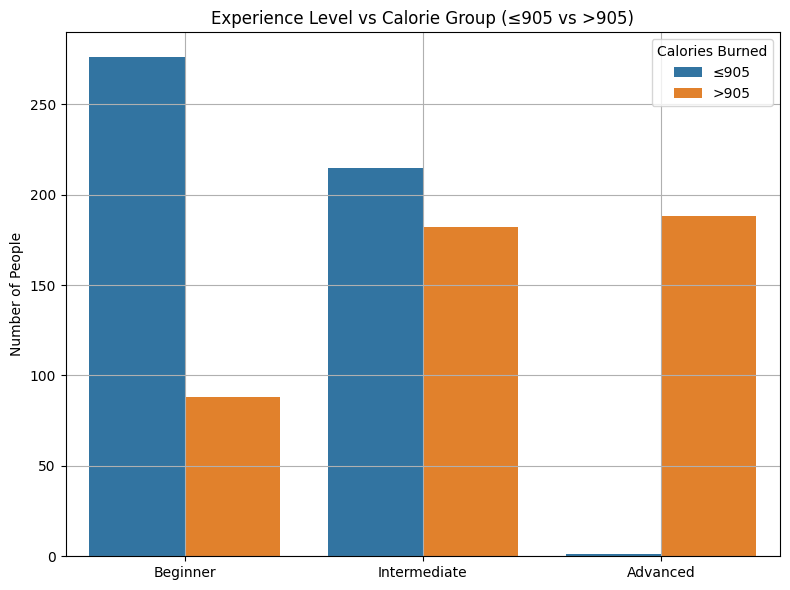

In [90]:

order_x = ['Beginner', 'Intermediate', 'Advanced']
order_hue = ['≤905', '>905']
df['Calorie_Group'] = df['Calories_Burned'].apply(lambda x: '>905' if x > 905 else '≤905')

plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x='Experience_Level',
    hue='Calorie_Group',
    order=order_x,
    hue_order=order_hue 
)

plt.title('Experience Level vs Calorie Group (≤905 vs >905)')
plt.xlabel('')
plt.ylabel('Number of People')
plt.legend(title='Calories Burned')
plt.grid(True)
plt.tight_layout()
plt.show()

Wyznaczona ze zbioru danych średnia ilość spalonych kalorii wynosi <font color="red">905 kcal</font>. Osoby zaawansowane spalały podczas sesji praktycznie zawsze więcej kalorii niz średnia dla całego badania. Osoby początkujące rzadko dobijały do średniej. Osoby o średnim etapie wtajemniczenia w kulturę fizyczną zgodnie z oczekiwaniami prawie po równo rozeszły się po obu stronach średniej. Z powyższego można wysunąć wniosek: *<font color="red">Poziom zaawansowania w treningu, a więc wskazanie na poziom roztrenowania organizmu wskazuje na skłonność organizmu do spalania kalorii. Im lepsza forma fizyczna, tym więcej kalorii osoba spala</font>*. 

<br><br>Natmiast poziom zaawansowania sam w sobie "nie spala kalorii". Należy pamiętać o tym, że wyższy **Experience level** warunkuje również bardziej zaawansowane formy treningów, które są ustrukturyzowane i bardziej zorientowane na rozwój, niż powszechna potrzeba rekreacyjnej aktywności fizycznej wśród osób początkujących. Również rozkład BMI dla osób wytrenowanych jest wyraźnie spłaszczony względem pozostałych grup. Wskazują na to poniższe boxploty. 

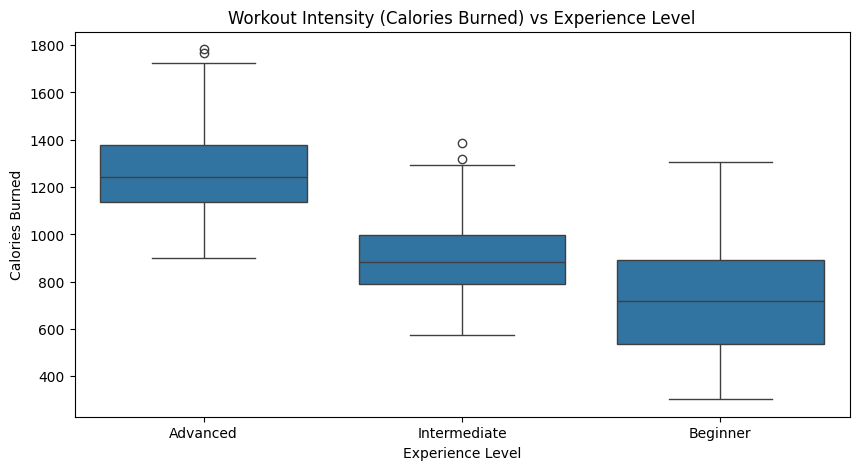

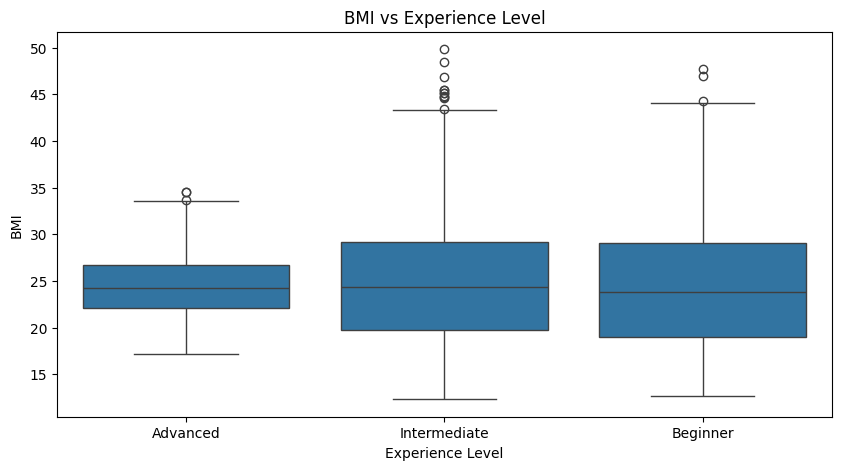

In [91]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Experience_Level", y="Calories_Burned", data=df)
plt.title("Workout Intensity (Calories Burned) vs Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Calories Burned")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="Experience_Level", y="BMI", data=df)
plt.title("BMI vs Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("BMI")
plt.show()

Przyjrzyjmy się różnicom w wartościach ze względu na płeć. Wg poniższego **violin plot**:

Text(0.5, 1.0, 'Fat Percentage vs. Gender')

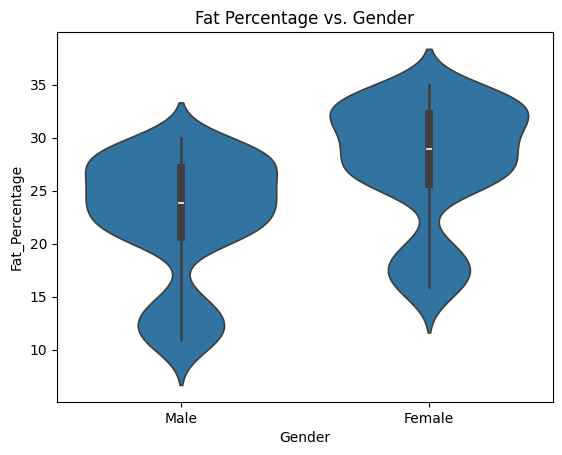

In [92]:
sns.violinplot(x='Gender', y='Fat_Percentage', data=df)
plt.title(f'Fat Percentage vs. Gender')


 - Mężczyźni najczęściej mają tkankę tłuszczową w zakresie **20-30%**
 - Tkanka tłuszczowa kobiet najczęściej zawiera się w przedziale **25-35%**
 - Kobiety mają przesunięty rozkład poziomu tkanki tłuszczowej w górę - co jest zgodne z różnicami budowy anatomicznej między płciami.
 - Wcięcia w wykresach wskazują na mniejszą liczbę obserwacji w określonych zakresach, szczególnie w obszarach niskiego i bardzo wysokiego procentu tkanki tłuszczowej.

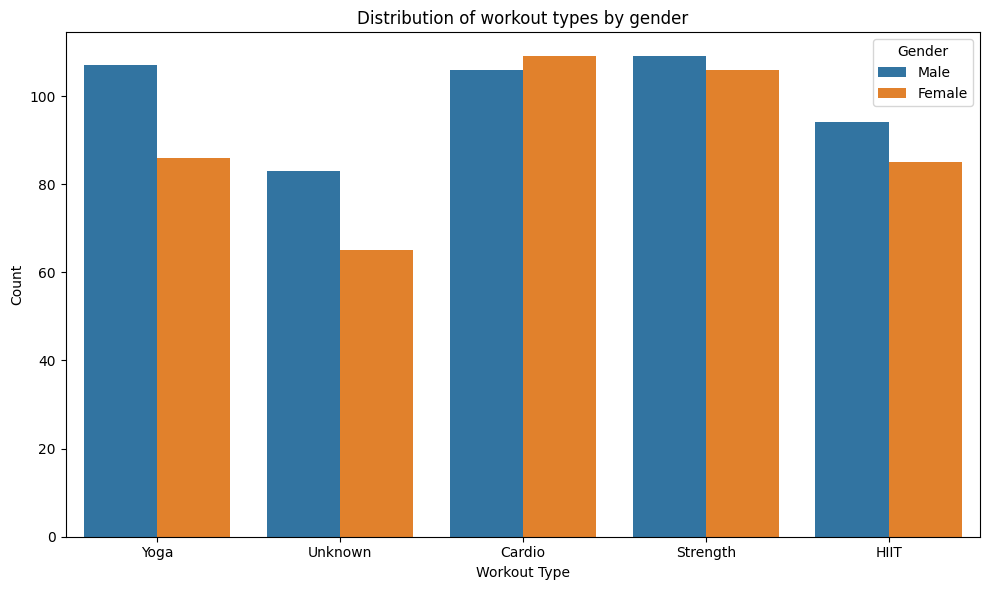

In [93]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Workout_Type', hue='Gender')
plt.title('Distribution of workout types by gender')
plt.xlabel('Workout Type')
plt.ylabel('Count')
plt.xticks()
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

W zbiorze występuje lekka nadreprezentacja rekordów dotyczących danych mężczyzn.

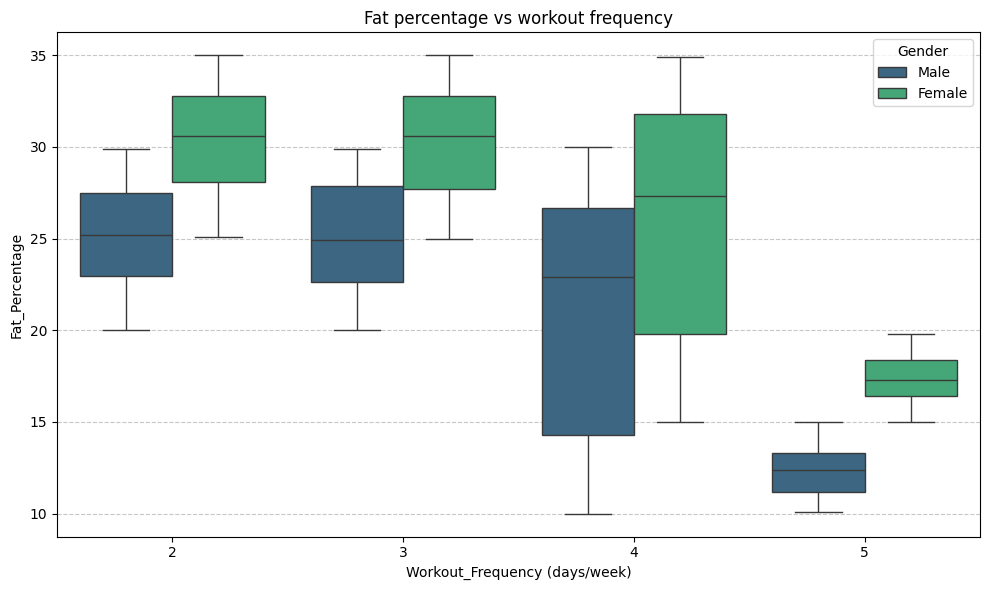

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Workout_Frequency (days/week)', y='Fat_Percentage', hue='Gender', palette='viridis')
plt.title('Fat percentage vs workout frequency')
plt.xlabel('Workout_Frequency (days/week)')
plt.ylabel('Fat_Percentage')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Powyższe box ploty wskazują, że osoby trenujące więcej razy w tygodniu mają w ujęciu średnim - niższą tkankę tłuszczową. Bardzo ładnie widać również naturalną różnicę w poziomie tkanki tłuszczowej ze względu na płeć. Poziomy zakresów tkanki tłuszczowej w ujęciu częstości trenowania są na podobnym poziomie, wykres kobiet jest przesunięty po prostu wyżej.

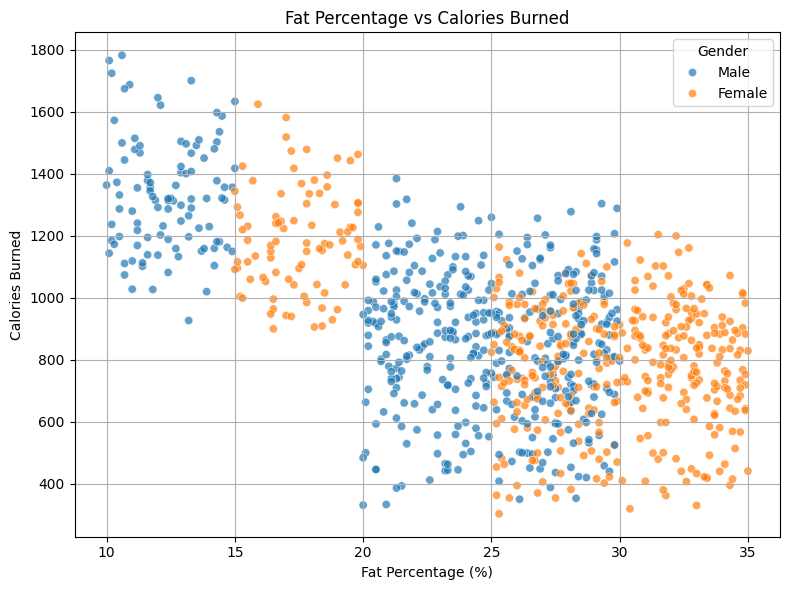

In [95]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Fat_Percentage', y='Calories_Burned', hue='Gender', alpha=0.7)
plt.title('Fat Percentage vs Calories Burned')
plt.xlabel('Fat Percentage (%)')
plt.ylabel('Calories Burned')
plt.grid(True)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

Z powyższego wykresu można wysnuć ciekawą obserwację. <font color="red">*Osoby o niższym poziomie tkanki tłuszczowej spalają więcej kalorii.*</font> <br>
Wydawałoby się, że więcej tkanki tłuszczowej, wkazuje na większą masę, a więc przy wysiłku fizycznym większą ilość pracy do wykonania, co mogłoby warunkować więcej spalonych kalorii. 

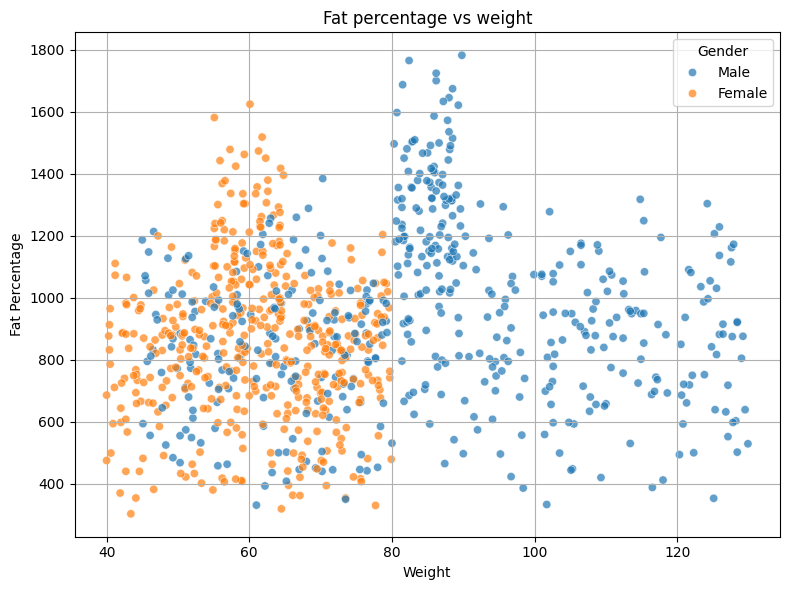

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Weight (kg)',
    y='Calories_Burned',
    hue='Gender',
    alpha=0.7
)

plt.title('Fat percentage vs weight')
plt.xlabel('Weight')
plt.ylabel('Fat Percentage')
plt.grid(True)
plt.tight_layout()
plt.show()

<br>Wykres powyżej przedstawia stosunek spalonych kalorii do wagi osoby. Obserwujemy oczywiście ogólnie niższą wagę kobiet. Natomiast dla obu płci wykres jest bardzo rozproszony. <br><font color="red"> *Waga trenującego ani jego/jej poziom tkanki tłuszczowej nie warunkuje ilości spalonych kalorii.*</font>

Analiza opisowa
---

Przed rozpoczęciem analizy sprawdzamy przy pomocy jakiej skali można opisać poszczególne zmienne.
<br><br>
Skala nominalna - Gender, Workout Type (cechy kategoryczne, bez porządku)<br>
Skala porządkowa - Experience Level (cechy kategoryczne, możliwe jest ustalenie hierarchii)<br>
Skala ilorazowa - pozostałe zmienne (dane liczbowe, posiadają zero absolutne)

In [97]:
exp_order = ['Beginner', 'Intermediate', 'Advanced']
df['Experience_Level'] = pd.Categorical(df['Experience_Level'],
                                        categories=exp_order,
                                        ordered=True)

df.groupby('Experience_Level', observed=True)['Session_Duration (minutes)'].describe()

,count,mean,std,min,25%,50%,75%,max
Experience_Level,,,,,,,,
Beginner,364.0,60.784615,17.226566,30.0,45.6,60.6,76.35,90.0
Intermediate,397.0,74.818640,8.847276,60.0,67.8,75.6,82.20,90.0
Advanced,189.0,105.596825,8.396009,90.6,99.0,106.2,112.20,120.0


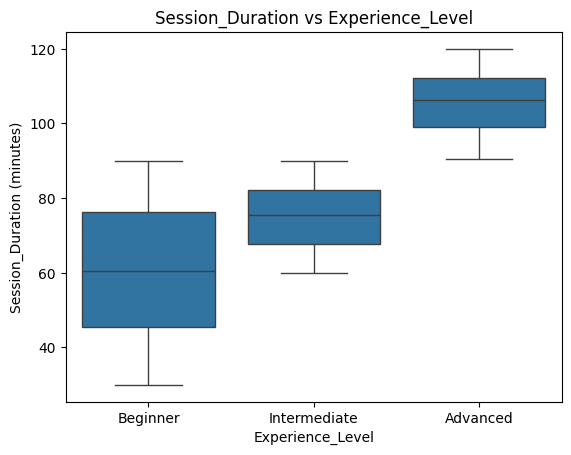

In [98]:
sns.boxplot(data=df, x='Experience_Level', y='Session_Duration (minutes)', order=['Beginner', 'Intermediate', 'Advanced'])
plt.title('Session_Duration vs Experience_Level')
plt.show()

In [99]:
df.groupby('Experience_Level', observed=True)['Calories_Burned'].describe()

,count,mean,std,min,25%,50%,75%,max
Experience_Level,,,,,,,,
Beginner,364.0,724.925824,227.525805,303.0,535.75,718.0,892.0,1304.0
Intermediate,397.0,898.292191,150.872782,576.0,789.00,885.0,996.0,1385.0
Advanced,189.0,1264.566138,187.660519,900.0,1138.00,1241.0,1378.0,1783.0


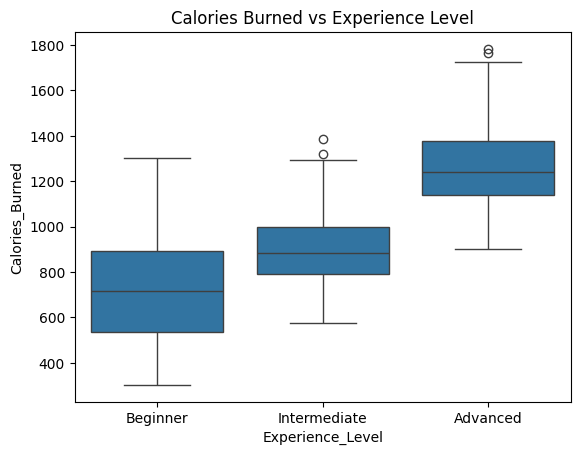

In [100]:
sns.boxplot(data=df, x='Experience_Level', y='Calories_Burned', order=['Beginner', 'Intermediate', 'Advanced'])
plt.title('Calories Burned vs Experience Level')
plt.show()

In [101]:
df.groupby('Experience_Level', observed=True)['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
Experience_Level,,,,,,,,
Beginner,364.0,24.626236,6.974744,12.67,19.0175,23.77,29.11,47.72
Intermediate,397.0,25.210202,7.294337,12.32,19.7400,24.37,29.17,49.84
Advanced,189.0,24.732910,3.932110,17.20,22.1500,24.20,26.74,34.53


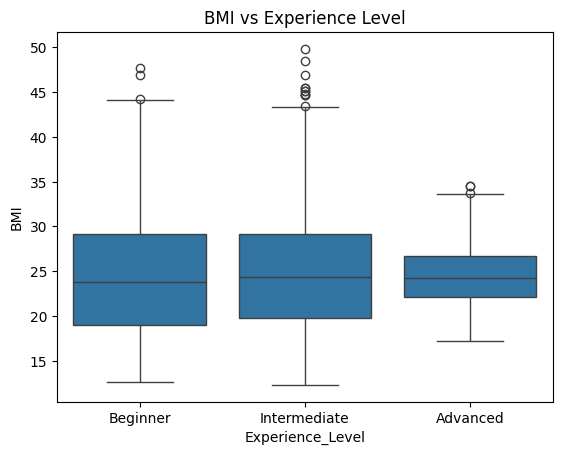

In [102]:
sns.boxplot(data=df, x='Experience_Level', y='BMI', order=['Beginner', 'Intermediate', 'Advanced'])
plt.title('BMI vs Experience Level')
plt.show()

Powyższe tabele i wykresy pudełkowe przedstawiają wyraźną zależność między poziomem doświadczenia, a ilością spalonych kalorii i czasem trwania sesji treningowej. Taka zależność nie jest widoczna z kolei dla przyrównania kolejnych poziomów doświadczenia z BMI.<br>
Miara BMI nie jest adekwatna dla całości populacji. Obejmuje jedynie ogół populacji i standardowe sylwetki. Nie ma zastosowania dla osób dobrze i bardzo dobrze wytrenowanych, charakteryzujących się wyższą masą mięśniową, a więc wyższą masą ogólnie - co może błędnie wskazywać na nadwagę lub otyłość.

Przed sprawdzeniem dostrzeżonych zależności przy użyciu testu statystycznego ANOVA sprawdzamy skośność rozkładów cech.

In [103]:
print("Skośność BMI:", skew(df['BMI']))
print("Skośność Session_Duration:", skew(df['Session_Duration (minutes)']))
print("Skośność Fat_Percentage:", skew(df['Fat_Percentage']))

Skośność BMI: 0.7463383882931008
Skośność Session_Duration: 0.024839825391122367
Skośność Fat_Percentage: -0.6274039822646897


Wyniki analizy skośności informują nas, że rozkład BMI jest skośny w prawo, rozkład Fat_Percentage jest skośny w lewo, a Session_Duration ma rozkład normalny. Dla większej ilości obserwacji (>30) możemy jednak wciąż zastosować test ANOVA.

In [104]:
anova_session_exp = f_oneway(
    df[df['Experience_Level'] == 'Beginner']['Session_Duration (minutes)'],
    df[df['Experience_Level'] == 'Intermediate']['Session_Duration (minutes)'],
    df[df['Experience_Level'] == 'Advanced']['Session_Duration (minutes)']
)
print("Session Duration (minutes) vs Experience Level:")
print(f"F-statistic: {anova_session_exp.statistic:.3f}, p-value: {anova_session_exp.pvalue:.4f}")

anova_calories_exp = f_oneway(
    df[df['Experience_Level'] == 'Beginner']['Calories_Burned'],
    df[df['Experience_Level'] == 'Intermediate']['Calories_Burned'],
    df[df['Experience_Level'] == 'Advanced']['Calories_Burned']
)
print("\nCalories Burned vs Experience Level:")
print(f"F-statistic: {anova_calories_exp.statistic:.3f}, p-value: {anova_calories_exp.pvalue:.4f}")

anova_bmi_exp = f_oneway(
    df[df['Experience_Level'] == 'Beginner']['BMI'],
    df[df['Experience_Level'] == 'Intermediate']['BMI'],
    df[df['Experience_Level'] == 'Advanced']['BMI']
)
print("\nBMI vs Experience Level:")
print(f"F-statistic: {anova_bmi_exp.statistic:.3f}, p-value: {anova_bmi_exp.pvalue:.4f}")

Session Duration (minutes) vs Experience Level:
F-statistic: 779.559, p-value: 0.0000

Calories Burned vs Experience Level:
F-statistic: 498.670, p-value: 0.0000

BMI vs Experience Level:
F-statistic: 0.804, p-value: 0.4479


Wyniki jednoczynnikowej analizy wariancji (test ANOVA) potwierdzają obserwacje z wykresów.

Wizualizacja macierzy korelacji pomiędzy wszystkimi zmiennymi numerycznymi

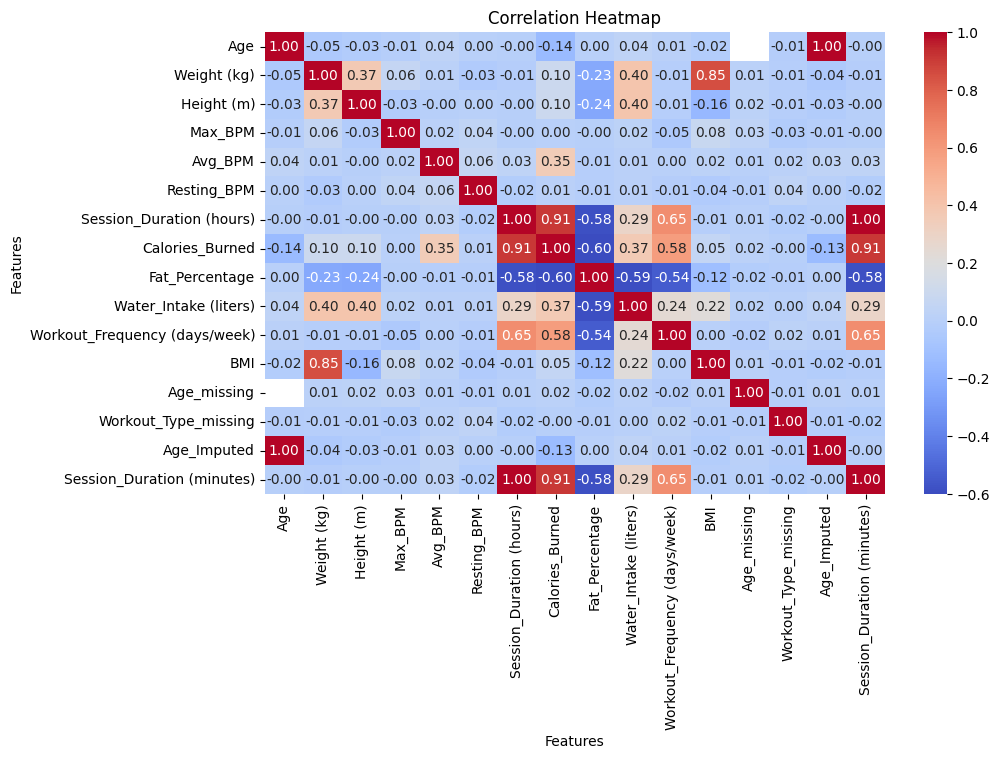

In [105]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), 
            cmap='coolwarm',
            annot=True,
            fmt='.2f',
            )
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

### Analiza macierzy korelacji
1. Najsilniejszą korelację dodatnią zaobserwowano pomiędzy **Session_Duration** oraz **Calories_Burned**. Wskazuje to na bezpośrednią zależność pomiędzy czasem trwania sesji treningowej a liczbą spalonych kalorii — im dłuższy czas aktywności, tym wyższy wydatek energetyczny.<br><br>
2. Zmienna **BMI** wykazuje wysoką korelację z **Weight (kg)**, co jest zgodne z oczekiwaniami - waga warunkuje wskaźnik BMI.<br><br>
3. Zmienne parametrów tętna (**Avg_BPM**, **Resting_BPM**) są dosyć słabo powiązane z pozostałymi zmiennymi, co może sugerować ich drugorzędne znaczenie w analizowanej próbie.<br><br>
4. **Workout_Frequency (days/week)** jest umiarkowanie skorelowany  z **Calories_Burned** oraz **Session_Duration** - potwierdza to wpływ regularności treningów na łączny wydatek energetyczny.<br><br>
5. Zmienna **Fat_percentage** wykazuje silną korelację ujemną z: **Session_duration (hours)**, **Calories_Burned**, **Water_Intake (liters)** oraz **Workout_Frequency (days/week)**. Wnioskujemy z tego, że ze wzrostem długości treningu, spalanych kalorii, przyjmowania płynów oraz częstości treningu - znacznie spada wartość tkanki tłuszczowej w organizmie.

Wnioski
---

- Macierz korelacji wskazuje na spójność i logiczne powiązania między zmiennymi w zbiorze danych. Szczególnie istotne zależności zaobserwowano dla zmiennych związanych z czasem trwania sesji, wydatkiem energetycznym oraz zawartością tkanki tłuszczowej.
- Im więcej trenujesz (częściej lub dłużej), tym mniejszy masz procent tkanki tłuszczowej, tym zdrowszy jesteś.
- Wytrwanie i konsekwentne utrzymanie stosunkowo wysokiej aktywności fizycznej odpłaca się lepszymi parametrami zdrowotnymi.
- Miara BMI nie jest idealna dla stwierdzenia "ogólnego poziomu zdrowia" jednostki.